In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#data downloaded from yahoo finance, since 12/31/1981
#oxy,occidental petroleum is a good choice because news sentiment impact is minimal compared to popular stocks like tesla
#Also, oxy's stock price is directly correlated with wti crude price
df = pd.read_csv('oxy.csv') 
df.shape

(9894, 7)

In [3]:
df = df.iloc[-250:]

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
9644,4/1/2020,11.04,11.17,10.12,10.74,10.717722,39837200
9645,4/2/2020,11.48,13.91,11.20,12.77,12.743512,79141600
9646,4/3/2020,13.83,14.20,11.51,13.00,12.973035,92062300
9647,4/6/2020,12.60,13.50,12.43,13.44,13.412123,52068100
9648,4/7/2020,14.18,15.20,13.62,13.84,13.811293,54728600


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
9889,3/23/2021,26.379999,27.280001,26.090000,26.590000,26.590000,20609400
9890,3/24/2021,27.500000,27.969999,26.959999,27.059999,27.059999,15596400
9891,3/25/2021,26.299999,26.780001,25.350000,26.700001,26.700001,18172000
9892,3/26/2021,27.740000,27.900000,26.860001,27.760000,27.760000,16255400
9893,3/29/2021,27.309999,27.340000,26.360001,27.000000,27.000000,13881700


In [6]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

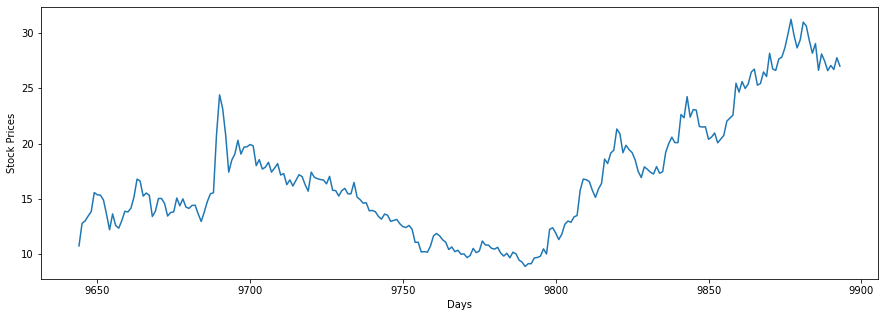

In [7]:
#stock price chart for oxy
plt.figure(figsize = (15, 5))
plt.plot(df['Close'])
plt.xlabel('Days')
plt.ylabel('Stock Prices')
plt.show()

 GEOMETRIC BROWNIAN MOTION 

Parameter Definitions \
$S_0$    :   initial stock price \
dt    :   time increment -> a day in our case \
T     :   length of the prediction time horizon(how many time points to predict, same unit with\
dt(days))
N     :   number of time points in prediction the time horizon -> T/dt.\
t     :   array for time points in the prediction time horizon [1, 2, 3, .. , N] \
$\mu$    :   mean of historical daily returns \
$\sigma$ :   standard deviation of historical daily returns \
b     :   array for brownian increments \
$W_k$     :   array for brownian path 

$S_k = S_0e^{(\mu-\frac{1}{2}{\sigma}^2) + \sigma W_k}$

In [8]:
#first we compute the daily returns sigma and standard deviation from historical data since 8/23/2000
returns = (df.loc[1:, 'Close'] - \
           df.shift(1).loc[1:, 'Close']) / \
           df.shift(1).loc[1:, 'Close']
returns.tolist()

[nan,
 0.1890130353817504,
 0.018010963194988287,
 0.03384615384615381,
 0.029761904761904788,
 0.12427745664739889,
 -0.012853470437018063,
 -0.0019531249999999584,
 -0.028049575994781455,
 -0.08657718120805376,
 -0.103600293901543,
 0.11721311475409849,
 -0.0763022743947176,
 -0.019857029388403495,
 0.05510534846029171,
 0.06528417818740397,
 -0.004325883201153477,
 0.024619840695148432,
 0.07208480565371021,
 0.10613058668424537,
 -0.01072711497454623,
 -0.08192771084337357,
 0.01837270341207345,
 -0.012886597938144284,
 -0.12532637075718014,
 0.03582089552238809,
 0.08213256484149847,
 0.0006657789613848061,
 -0.029940119760478997,
 -0.07818930041152267,
 0.023809523809523832,
 0.004360465116279106,
 0.09044862518089725,
 -0.04644990046449907,
 0.04314544189283236,
 -0.0493662441627752,
 -0.008421052631578892,
 0.019108280254777038,
 0.0013888888888888592,
 -0.05409153952843269,
 -0.05058651026392971,
 0.0664092664092665,
 0.06806661839246919,
 0.04745762711864402,
 0.0064724919093

In [9]:
mu = np.mean(returns)
sig = np.std(returns)
mu, sig

(0.005262706392780963, 0.05695932809229622)

In [10]:
# initial stock price is the close price on 1/26/2021
So = df.Close.iloc[0]
print(So)

10.74


In [11]:
def BrownianMotion(seed, N):
    
    np.random.seed(seed)

    Z = np.random.randn(N)     #random variables
    Z[0] = 0
    
    dW = np.sqrt(dt)* Z        #single Brownian increment
    
    W = np.cumsum(dW)          #Brownian path
    
    return W

In [12]:
def GBM(So, mu, sigma, W, N, t):
    
    S = []
    S.append(So)
          
    for i in range(1,N):
        drift = (mu - 0.5 * sigma**2) *t[i]       #Calculating the deterministic part
        diffusion = sigma * W[i-1]                #Calculating the stochastic part
        S_i = So * np.exp(drift + diffusion)
        S.append(S_i)
        
    return S

In [13]:
def exp_GBM(So, mu, sigma,N, T):
    
    S = []
    S.append(So)
          
    for i in range(1,N):
        drift = (mu + 0.5 * sigma**2) *T[i]       #Calculating the deterministic part
        S_i = So * np.exp(drift)
        S.append(S_i)
        
    return S

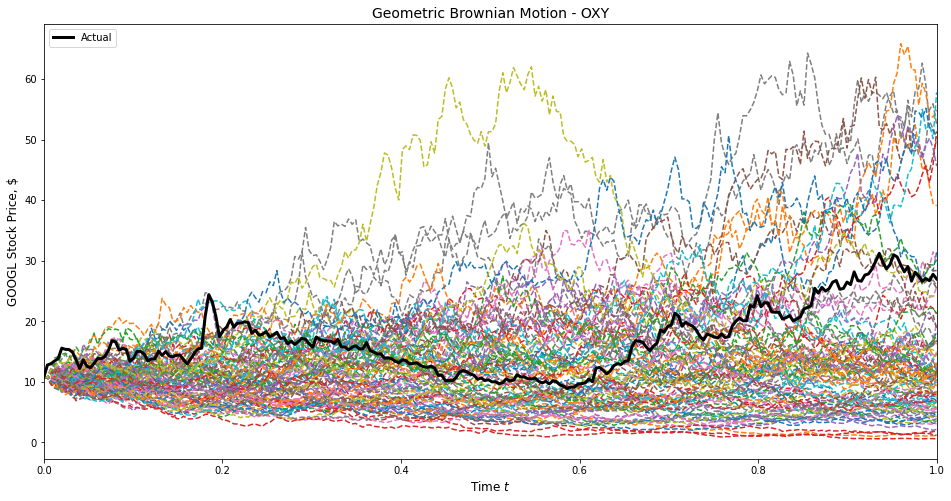

In [14]:
T=1.
N = 250
#So = adj_reversed[0]
t = np.linspace(0., T, N)    
dt=1

plt.figure(figsize = (16, 8))

for seed in range(1, 100):   
    W = BrownianMotion(seed, N)  
    solution = GBM(So, mu, sig, W, N, t)
    plt.plot(t, solution, ls='--')
    
plt.plot(t, df.Close, label = 'Actual', color = "black", linewidth = 3)
plt.xlabel('Time $t$', fontsize = 12)
plt.ylabel('GOOGL Stock Price, $', fontsize = 12)
plt.title('Geometric Brownian Motion - OXY', fontsize = 14)

plt.legend(loc = 'upper left')
axes = plt.gca()
axes.set_xlim([0,T])

plt.show()

In [15]:
#Euler Maruyama Approximation

    
def Em(So, mu, sigma, b, T, N, TS):
    dt = TS * (1./N)                            # EM step size
    L = N / TS                              # intervals according to the TS
    wi = []
    wi.append(So)
    for i in range (0, int(L)):
        delta_Wi = b[i-1] - b[i]
        wi_new = wi[i] + mu * wi[i] * dt + sigma *wi[i] * delta_Wi
        wi.append(wi_new)
    return wi, dt

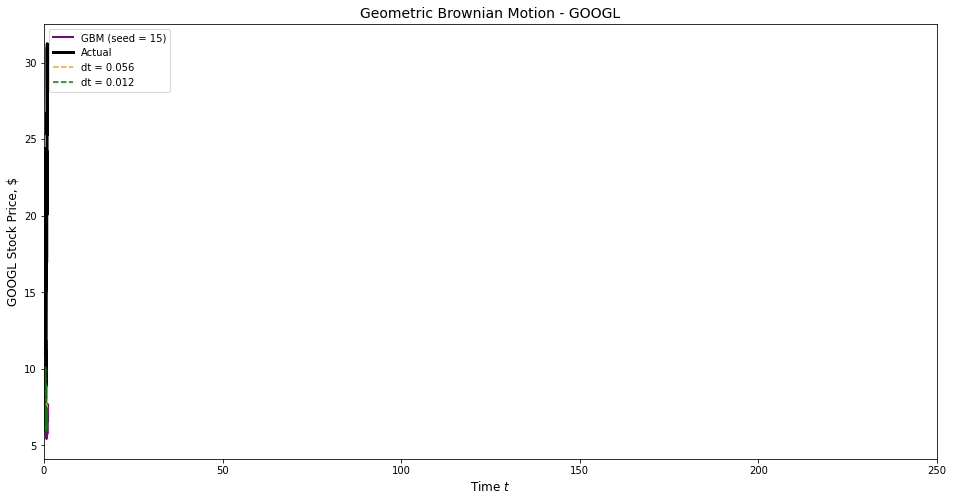

In [16]:
T=1.
N = 250
So = df.Close.iloc[0]  #adj. close price of GOOGL as of January 3rd, 2017 

seed = 15
W = BrownianMotion(seed, N)
solution = GBM(So, mu, sig, W, N, t)  #exact solution
t = np.linspace(0., 1., N)    #time increments

plt.figure(figsize = (16, 8))

plt.plot(t, solution, label = 'GBM (seed = 15)', color = "purple", linewidth = 2)
plt.plot(t, df.Close, label = 'Actual', color = "black", linewidth = 3)

#use different time steps for Euler Maruyama Approximation
b = BrownianMotion(seed, N)
TS = 14
L = N/TS
Approx_1 = Em(So, mu, sig, W, T, N, TS)[0]
time_Em_1 = np.linspace(0., 1., int(L+1))
dt_1 = Em(So, mu, sig, W, T, N, TS)[1] #0.056

b = BrownianMotion(seed, N)
TS = 3
L = N/TS
Approx_2 = Em(So, mu, sig, W, T, N, TS)[0]
time_Em_2 = np.linspace(0., 1., int(L+1))
dt_2 = Em(So, mu, sig, W, T, N, TS)[1] #0.012

plt.plot(time_Em_1, Approx_1, label = 'dt = 0.056', color = "orange", ls = '--')
plt.plot(time_Em_2, Approx_2, label = 'dt = 0.012', color = "green", ls = '--')


plt.xlabel('Time $t$', fontsize = 12)
plt.ylabel('GOOGL Stock Price, $', fontsize = 12)
plt.title('Geometric Brownian Motion - GOOGL', fontsize = 14)

plt.legend(loc = 'upper left')
axes = plt.gca()
axes.set_xlim([0,N])
plt.show()

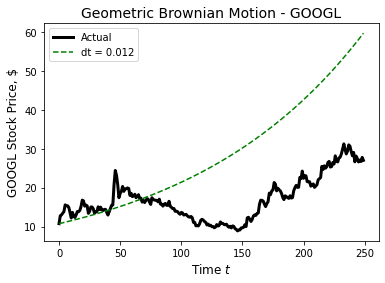

[10.74,
 10.81419883930075,
 10.888910291986377,
 10.964137899520399,
 11.03988522783304,
 11.116155867490276,
 11.192953433864018,
 11.2702815673035,
 11.348143933307837,
 11.426544222699762,
 11.505486151800602,
 11.584973462606419,
 11.66500992296539,
 11.745599326756432,
 11.826745494069,
 11.908452271384206,
 11.990723531757117,
 12.073563175000373,
 12.156975127869025,
 12.240963344246675,
 12.325531805332908,
 12.410684519831992,
 12.496425524142918,
 12.582758882550706,
 12.669688687419093,
 12.757219059384488,
 12.845354147551316,
 12.934098129688687,
 13.023455212428436,
 13.113429631464516,
 13.204025651753785,
 13.295247567718164,
 13.387099703448222,
 13.479586412908116,
 13.572712080142002,
 13.666481119481835,
 13.76089797575662,
 13.855967124503097,
 13.95169307217791,
 14.048080356371198,
 14.145133546021702,
 14.242857241633333,
 14.341256075493245,
 14.440334711891422,
 14.540097847341764,
 14.640550210804717,
 14.741696563911425,
 14.843541701189459,
 14.94609045029

In [17]:
N=250 
T=range(N)
t_pred = [So*np.exp((mu + sig**2/2)*t) for t in range(N)]
plt.plot(T, df.Close, label = 'Actual', color = "black", linewidth = 3)


plt.plot(T, t_pred, label = 'dt = 0.012', color = "green", ls = '--')


plt.xlabel('Time $t$', fontsize = 12)
plt.ylabel('GOOGL Stock Price, $', fontsize = 12)
plt.title('Geometric Brownian Motion - GOOGL', fontsize = 14)

plt.legend(loc = 'upper left')
axes = plt.gca()
plt.show()
t_pred

In [18]:
# T is the length of the prediction time horizon, from 1/27/2021 to 2/27/2021
# number of trading days 
end_date = '2020-02-16'
pred_end_date = '2020-03-16'
day_interval = pd.date_range(start = end_date, 
                end = pred_end_date, freq = 'D').map(lambda x:
                x if x.isoweekday() in range(1, 6) else np.nan).dropna()
print(day_interval)

DatetimeIndex(['2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20',
               '2020-02-21', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-03-02', '2020-03-03',
               '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-16'],
              dtype='datetime64[ns]', freq=None)


In [19]:

[So*np.exp((mu + sig**2/2)*t) for t in range(31)]

[10.74,
 10.81419883930075,
 10.888910291986377,
 10.964137899520399,
 11.03988522783304,
 11.116155867490276,
 11.192953433864018,
 11.2702815673035,
 11.348143933307837,
 11.426544222699762,
 11.505486151800602,
 11.584973462606419,
 11.66500992296539,
 11.745599326756432,
 11.826745494069,
 11.908452271384206,
 11.990723531757117,
 12.073563175000373,
 12.156975127869025,
 12.240963344246675,
 12.325531805332908,
 12.410684519831992,
 12.496425524142918,
 12.582758882550706,
 12.669688687419093,
 12.757219059384488,
 12.845354147551316,
 12.934098129688687,
 13.023455212428436,
 13.113429631464516,
 13.204025651753785]

In [20]:
# b is an array of random numbers from standard normal distribution using monte carlo simulation
sim_size = 1000
b = {str(sim): np.random.normal(0, 1, int(N)) for sim in range(1, sim_size + 1)}
print(b)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [21]:
# W is brownian motion, W_0 = b_0, W_1 = b_0 + b_1, W_2= b_0 + b_1 +b_2, ...
# def of brownian motion, independent increment, continuous, W_t - W_s ~ N(0,t-s) 
W = {str(sim): b[str(sim)].cumsum() for sim in range(1, sim_size + 1)}
print(W)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [22]:
#drift and diffusion
drift = (mu - 0.5 * sigma**2) * t
print("drift:\n", drift)
diffusion = {str(sim): sigma * W[str(sim)] for sim in range(1, sim_size + 1)}
print("diffusion:\n", diffusion)

NameError: name 'sigma' is not defined

In [ ]:
#prediction for future 30 days
S = np.array([So * np.exp(drift + diffusion[str(sim)]) for sim in range(1, sim_size + 1)]) 
S = np.hstack((np.array([[So] for sim in range(sim_size)]), S))
S

In [ ]:
# Plotting the simulations
plt.figure(figsize = (20,10))

for i in range(sim_size):
    plt.title("Daily Volatility: " + str(sigma))
    plt.plot(day_interval, S[i, :])
    plt.ylabel('Stock Prices, €')
    plt.xlabel('Prediction Days')
    
plt.show()

It can be shown that S is lognormally distributed with mean $S_0e^{\mu t}$ \
and variance $S_0 e^{2\mu t} (e^{\sigma^2 t}-1)$

One big drive for oxy's stock price is wti crude oil price. Current wti is around 61 dollars, so a good estimate will be on upper section. 
